# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from keras import Sequential
from keras.layers import Dense, Softmax
from keras.utils import to_categorical

%matplotlib inline

# Plotting setup

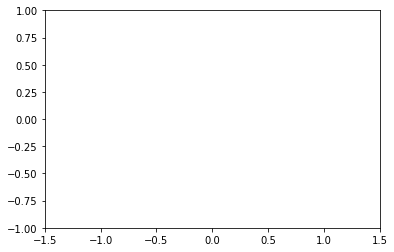

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1,1])
line1, = ax.plot([], [], '-')
line2 = ax.scatter([], [])

In [3]:
# Helper function to visualize decision boundaries
def visualize(model, data, labels, w, b, title=None, colors=['r','b','g'], background_colors=['#FF6969', '#6B94DC', '#6DDC6B']):
    nx,ny = 500,500
    xx,yy = np.meshgrid(np.linspace(-1.5, 1.5, nx), np.linspace(-1, 1, ny))
    x_grid = np.hstack((xx.flatten().reshape(nx*ny,1), yy.flatten().reshape(nx*ny,1)))

    y_pred = model.predict(x_grid, verbose=False)
    g = np.argmax(y_pred, axis=1)
    c = [background_colors[v] for v in g]
    plt.scatter(xx, yy, c=c, s=40, marker='s', edgecolor='none')#, cmap=plt.cm.Spectral)
    plt.scatter([x[0] for x in data], [x[1] for x in data], c=[colors[l] for l in labels], s=40)
    plt.xlim([-1.5,1.5])
    plt.ylim([-1,1])
    if title:
        plt.title(title)
    plt.show()

# Data Generation
This time, we will generate some difficult toy data - you'll see soon what makes it difficult!

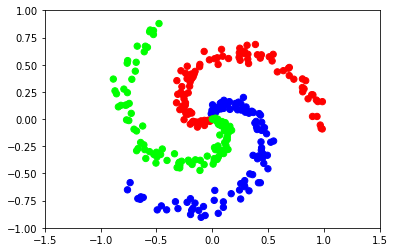

In [4]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.xlim([-1.5,1.5])
plt.ylim([-1,1])

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.get_cmap('brg'))
plt.show()

Just like last time, we have to convert `y` into a matrix of probabilities

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [6]:
y_probs = to_categorical(y)
print(y_probs)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

# Learning a model

In [7]:
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(10, input_shape=(100,), activation='relu'))
model.add(Dense(3))
model.add(Softmax())

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
_________________________________________________________________
softmax (Softmax)            (None, 3)                 0         
Total params: 1,343
Trainable params: 1,343
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X, y_probs, epochs=200, verbose=False)

# Plot history

In [9]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title("Accuracy")
plt.ylim((0.0, 1.01))

plt.figure()
plt.plot(history.history['loss'])
plt.title("Loss")
plt.ylim((0.0, 1.01))


KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

# Visualization

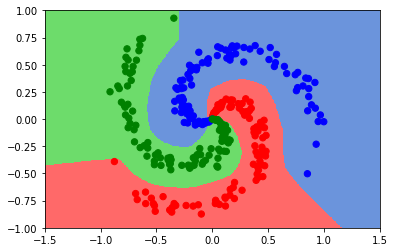

In [ ]:
w, b = model.layers[0].get_weights()
visualize(model, X, y, w, b)